# Proyek Analisis Data: E-Commerce Public Dataset
Nama: Dean Annisa R
Email: deanannissar06@gmail.com
Modul: Data Analysis 




# Menentukan Pertanyaan Bisnis


1.   Bagaimana performa penjualan dan revenue perusahaan dalam 1 tahun 3 bulan terakhir?
2.   Produk apa yang paling banyak dan paling sedikit disukai?
3.   Dimana demografi daerah pelanggan yang paling banyak dan sedikit dimiliki berdasarkan city?





# **Menyaipkan semua library yang dibutuhkan**

In [85]:
%pip install gdown
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install babel
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gdown in c:\python311\lib\site-packages (4.7.1)




[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached streamlit-1.29.0-py2.py3-none-any.whl (8.4 MB)
  Using cached altair-5.2.0-py3-none-any.whl (996 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached jsonschema-4.20.0-py3-none-any.whl (84 kB)
  Using cached jsonschema_specifications-2023.11.2-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\jsonschema.exe' -> 'c:\\Python311\\Scripts\\jsonschema.exe.deleteme'


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import gdown as gd
from datetime import datetime, timedelta
import urllib
import zipfile
import matplotlib.image as mpimg
import requests
import io
import os

# Data Wrangling
Gathering Data

In [2]:
# Google Drive file ID
file_id = '1mq6eQjqnTNNTpL-l6BpHeR2xW42BcEnD'

# URL for file download
url = f'https://drive.google.com/uc?id={file_id}'

# https://drive.google.com/file/d/1mq6eQjqnTNNTpL-l6BpHeR2xW42BcEnD/view?usp=sharing
# Destination file path
downloaded_file = 'archive.zip'
output_folder = 'data/'

# Download the file
gd.download(url, downloaded_file, quiet=False)

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unzip the file
with zipfile.ZipFile(downloaded_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# Clean up: Remove the downloaded zip file
os.remove(downloaded_file)

print("Download and extraction completed.")

Downloading...
From (uriginal): https://drive.google.com/uc?id=1mq6eQjqnTNNTpL-l6BpHeR2xW42BcEnD
From (redirected): https://drive.google.com/uc?id=1mq6eQjqnTNNTpL-l6BpHeR2xW42BcEnD&confirm=t&uuid=11f8be98-89f6-49aa-a764-5c3f0e98f6cb
To: d:\data Chaca\Dicoding\data analisis\archive.zip
100%|██████████| 44.7M/44.7M [00:20<00:00, 2.20MB/s]


Download and extraction completed.


In [3]:
customer_df = pd.read_csv('./data/olist_customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
products_df = pd.read_csv('./data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Assessing Data
Menilai Data customers_dataset

In [9]:
customer_df.info()
print('\n------------------\n')
#check duplikasi
print("Total duplikasi : ", customer_df.duplicated().sum())
customer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

------------------

Total duplikasi :  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai Data products

In [10]:
products_df.info()
print('\n----------------\n')
#check missing value
products_df.isna().sum()
print('\n----------------\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

----------------


----------------



In [11]:
#check duplikasi product
print('Total duplikasi : ', products_df.duplicated().sum())

products_df.describe()

Total duplikasi :  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai Data sellers

In [12]:
sellers_df.info()
print('\n----------------\n')
#check duplikasi
print('Total duplikasi : ', sellers_df.duplicated().sum())

sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

----------------

Total duplikasi :  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Menilai Data order_items

In [13]:
order_items_df.info()
print('\n----------------\n')
#check duplikasi
print('Total duplikasi : ', order_items_df.duplicated().sum())

order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

----------------

Total duplikasi :  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai Data payments

In [14]:
payments_df.info()
print('\n----------------\n')
#check duplikasi
print('Total duplikasi : ', payments_df.duplicated().sum())

payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

----------------

Total duplikasi :  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menilai Data orders

In [15]:
orders_df.info()
print('\n----------------\n')
#check missing value
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

----------------



order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
#check duplikasi
print('Total duplikasi : ', orders_df.duplicated().sum())

orders_df.describe()

Total duplikasi :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


# Cleaning Data
Membersihkan Data customers

In [17]:
customer_df.info()
print('\n----------------\n')
total_duplication = customer_df.duplicated().sum()
print('Total duplikasi : ', total_duplication)

if total_duplication == 0:
    print('Total duplikasi : Data sudah bersih')
else:
    print('Total duplikasi : Data masih belum bersih')
print('\n----------------\n')
customer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

----------------

Total duplikasi :  0
Total duplikasi : Data sudah bersih

----------------



,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Membersihkan Data products

In [18]:
products_df.info()
print('\n----------------\n')
#check missing value
print('check missing value')
products_df[products_df.product_category_name.isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

----------------

check missing value


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [20]:
#check missing value product_category_name
products_df.dropna(axis=0, subset=['product_category_name'], inplace=True)

products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [21]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [22]:
#mengisi missing value
products_df.product_weight_g.fillna(value=products_df.product_weight_g.mean(), inplace=True)
products_df.product_length_cm.fillna(value=products_df.product_length_cm.mean(), inplace=True)
products_df.product_height_cm.fillna(value=products_df.product_height_cm.mean(), inplace=True)
products_df.product_width_cm.fillna(value=products_df.product_width_cm.mean(), inplace=True)

In [23]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [24]:
products_df.info()
print('\n----------------\n')
total_duplication = products_df.duplicated().sum()
print('Total duplikasi : ', total_duplication)

if total_duplication == 0:
    print('Total duplikasi : Data sudah bersih')
else:
    print('Total duplikasi : Data masih belum bersih')
print('\n----------------\n')
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB

----------------

Total duplikasi :  0
Total duplikasi : Data sudah bersih

----------------



,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
mean,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,10.245741,635.115225,1.736766,4279.225683,16.955703,13.635904,12.078575
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Membersihkan Data sellers

In [25]:
sellers_df.info()
print('\n----------------\n')
total_duplication = sellers_df.duplicated().sum()
print('Total duplikasi : ', total_duplication)

if total_duplication == 0:
    print('Total duplikasi : Data sudah bersih')
else:
    print('Total duplikasi : Data masih belum bersih')
print('\n----------------\n')
sellers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

----------------

Total duplikasi :  0
Total duplikasi : Data sudah bersih

----------------



,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Membersihkan Data pada order_items

In [26]:
datetime_column = ['shipping_limit_date']

for column in datetime_column:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [28]:
order_items_df.info()
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [27]:
#menampilkan data min price
order_items_df[order_items_df.price == order_items_df.price.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30


In [29]:
#menampilkan price min diatas 0.85
order_items_df.sort_values('price')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
...,...,...,...,...,...,...,...
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [30]:
#merubah value price 0.85 -> 1.20
order_items_df.replace({'price': 0.85},1.20, inplace=True)

order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653748,19.990320
min,1.000000,2016-09-19 00:15:34,1.200000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633922,15.806405


Membersihkan Data pada payments

In [31]:
payments_df.info()
print('\n----------------\n')
total_duplication = payments_df.duplicated().sum()
print('Total duplikasi : ', total_duplication)

if total_duplication == 0:
    print('Total duplikasi : Data sudah bersih')
else:
    print('Total duplikasi : Data masih belum bersih')
print('\n----------------\n')
payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

----------------

Total duplikasi :  0
Total duplikasi : Data sudah bersih

----------------



,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Membersihkan Data pada orders

In [33]:
datetime_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
"order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_column:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [35]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [36]:
# mengisi missing value
orders_df.order_approved_at.fillna(value=0, inplace=True)
orders_df.order_delivered_carrier_date.fillna(value=0, inplace=True)
orders_df.order_delivered_customer_date.fillna(value=0, inplace=True)

C:\Users\b\AppData\Local\Temp\ipykernel_22388\3030884947.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_df.order_approved_at.fillna(value=0, inplace=True)
C:\Users\b\AppData\Local\Temp\ipykernel_22388\3030884947.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_df.order_delivered_carrier_date.fillna(value=0, inplace=True)
C:\Users\b\AppData\Local\Temp\ipykernel_22388\3030884947.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_df.order_delivered_c

In [37]:
datetime_column = []
for column in datetime_column:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


# Exploratory Data Analysis (EDA)
Eksplorasi Data customers

In [39]:
# Melihat parameter customers
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [40]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [41]:
# Melihat demografi berdasarkan kota (city) yang memiliki banyak pelanggan
print('demografi persebaran pelanggan paling banyak')
most_populous_city = customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(1)
print(most_populous_city)
print('\n----------------\n')
print('demografi persebaran pelanggan paling sedikit')
smallest_populous_city = customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=True).head(1)
print(smallest_populous_city)


demografi persebaran pelanggan paling banyak
customer_city
sao paulo    15540
Name: customer_id, dtype: int64

----------------

demografi persebaran pelanggan paling sedikit
customer_city
lagoao    1
Name: customer_id, dtype: int64


Eksplorasi Data products

In [42]:
# Melihat parameter products
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245741,635.115225,1.736766,4279.225683,16.955703,13.635904,12.078575
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [43]:
# Melihat jumlah produk berdasarkan pada nama kategori produk
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

Eksplorasi Data order_items

In [44]:
# Membuat data order_items
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653748,19.990320
min,1.000000,2016-09-19 00:15:34,1.200000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633922,15.806405


In [45]:
# Menampilkan jumlah order item berdasarkan harganya
order_items_df.groupby(by="price").order_item_id.nunique().sort_values(ascending=False)

price
1.20       20
98.70      20
100.00     20
51.00      15
65.49      15
           ..
29.35       1
131.10      1
131.17      1
29.33       1
6735.00     1
Name: order_item_id, Length: 5967, dtype: int64

In [46]:
# Menampilkan jumlah order item berdarkan biaya transportasi
order_items_df.groupby(by="freight_value").order_item_id.nunique().sort_values(ascending=False)

freight_value
10.12     20
14.44     20
7.89      20
16.22     15
1.20      15
          ..
42.79      1
42.81      1
42.82      1
42.83      1
409.68     1
Name: order_item_id, Length: 6999, dtype: int64

# Eksplorasi Data payments

In [47]:
# Membuat pada payments
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [48]:
# Menampilkan pembayaran order berdasarkan nilai pembayarannya
payments_df.groupby(by="payment_value").order_id.nunique().sort_values(ascending=False)

payment_value
50.00       293
77.57       250
100.00      249
35.00       165
73.34       160
           ... 
222.07        1
222.09        1
222.11        1
222.15        1
13664.08      1
Name: order_id, Length: 29077, dtype: int64

Eksplorasi Data orders

In [49]:
# Membuat pada orders_dataset
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441.0,99441.0,99441.0,99441
unique,99441,99441,8,NaN,90734.0,81019.0,95665.0,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,0.0,0.0,0.0,NaN
freq,1,1,96478,NaN,160.0,1783.0,2965.0,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,2018-11-12 00:00:00


In [50]:
# Menampilkan jumlah order berdasarkan status order
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Eksplorasi Data customers dan orders

In [51]:
# Melihat informasi customer_id pelanggan yang pernah melakukan order
customer_id_in_orders_dataset = orders_df.customer_id.tolist()
customer_df['status'] = customer_df['customer_id'].apply(lambda x: 'active' if x in customer_id_in_orders_dataset else 'inactive')
customer_df.sample(10)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
98623,9aacda4060fd4835ee6541958cb9a1f7,fcb8b95b64932fc27a1a9189fe6ef713,8225,sao paulo,SP,active
53,b64ed91eab98972150bdaf77ca921934,3da7750bf3c1dbd724624a60a9f5942b,21310,rio de janeiro,RJ,active
12655,d61acc6e4228d52d3b651ba6ccfb3494,bc692241027448d60d0ebe0a55562ef8,4140,sao paulo,SP,active
2890,e2b04b6f3c6db2cc2233107af21b8b7b,e664e17fa897fc345bb97661a57a910b,35500,divinopolis,MG,active
31862,984053678c911516cd2eef9c66632357,4ea472e8a806da1db6126a573e4b08d2,38800,sao gotardo,MG,active
54229,d573d2e2d3e1ebdf6360fe42765582ec,4a1857ed6d79eb215ed4805b853e1356,79110,campo grande,MS,active
6106,29094bc1b31756d584d3c3bb60e5db45,561c3fe241a86774f0764fd533bbf102,98470,planalto,RS,active
13907,f923aa709f566bff2443096619a9cd9a,d4a3c35b34e3bb5f93d8b23b34d742b5,20780,rio de janeiro,RJ,active
67468,78f2dde0b75935b85e0d45ba45ff23cd,2f293b442348c20d12aa4537bd3d7234,18071,sorocaba,SP,active
26680,914cbf733559144aaba5e8bf27d61001,b082e14f2883a43b782eed33ace55661,25926,mage,RJ,active


In [52]:
# Melihat status pelanggan yang pernah order
customer_df.groupby(by="status").customer_id.count()

status
active    99441
Name: customer_id, dtype: int64

In [53]:
# Menggabungkan data orders_df dan customer_df
orders_customers_df = pd.merge(
    left=orders_df,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,active


In [54]:
# 10 jumlah order tertinggi berdasarkan kota
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index()

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


In [55]:
# 10 jumlah order terendah berdasarkan kota
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=True).reset_index()

,customer_city,order_id
0,lagoao,1
1,pedro gomes,1
2,caraibas,1
3,japoata,1
4,pedro velho,1
...,...,...
4114,curitiba,1521
4115,brasilia,2131
4116,belo horizonte,2773
4117,rio de janeiro,6882


Eksplorasi Data products dan order_items

In [56]:
# Menggabungkan data products_df dan order_items_df
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [57]:
# Menampilkan jumlah order berdasarkan nama kategori produk
order_items_products_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  9417
beleza_saude                     8836
esporte_lazer                    7720
informatica_acessorios           6689
moveis_decoracao                 6449
                                 ... 
la_cuisine                         13
cds_dvds_musicais                  12
pc_gamer                            8
fashion_roupa_infanto_juvenil       8
seguros_e_servicos                  2
Name: order_id, Length: 73, dtype: int64

In [58]:
# Menampilkan 10 produk paling banyak disukai
order_items_products_df.groupby(by="product_category_name")\
    .order_id.nunique()\
    .sort_values(ascending=False)\
    .head(10)

product_category_name
cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
utilidades_domesticas     5884
relogios_presentes        5624
telefonia                 4199
automotivo                3897
brinquedos                3886
Name: order_id, dtype: int64

In [59]:
# Menampilkan 10 produk paling sedikit disukai
order_items_products_df.groupby(by="product_category_name")\
    .order_id.nunique()\
    .sort_values(ascending=True)\
    .head(10)

product_category_name
seguros_e_servicos                                2
fashion_roupa_infanto_juvenil                     8
pc_gamer                                          8
cds_dvds_musicais                                12
la_cuisine                                       13
portateis_cozinha_e_preparadores_de_alimentos    14
artes_e_artesanato                               23
casa_conforto_2                                  24
fraldas_higiene                                  27
fashion_esporte                                  27
Name: order_id, dtype: int64

Eksplorasi Data order_items dan orders

In [60]:
# Menggabungkan data order_items_df dan orders_df
order_items_orders_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [61]:
# Menghapus pemesanan yang dibatalkan
order_items_orders_df[order_items_orders_df.order_status != 'canceled']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [62]:
# Melihat penjualan berdasarkan order_purchase_timestamp
order_items_orders_df.groupby(by="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="order_purchase_timestamp", ascending=True).reset_index()

,order_purchase_timestamp,order_id,order_item_id,price
0,2016-09-04 21:15:19,1,3,72.89
1,2016-09-05 00:15:34,1,1,59.50
2,2016-09-15 12:16:38,1,6,134.97
3,2016-10-02 22:07:52,1,1,100.00
4,2016-10-03 09:44:50,1,1,29.90
...,...,...,...,...
98107,2018-08-29 14:18:23,1,3,418.00
98108,2018-08-29 14:18:28,1,1,45.90
98109,2018-08-29 14:52:00,1,1,24.90
98110,2018-08-29 15:00:37,1,1,84.99


In [63]:
# Menggabungkan data orders_df, customers_df, products_df, dan order_items_df
x_df = pd.merge(
    left=orders_customers_df, # Berisi orders_df dan customers_df
    right=order_items_products_df, # Berisi order_items_df dan products_df
    how="left",
    left_on="order_id",
    right_on="order_id"
)
x_df

# Menggabungkan df x_df dan sellers_df
y_df = pd.merge(
    left=x_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
y_df

# Menggabungkan df y_df dan order_payments_df menjadi all_df (semua kumpulan df yang dibutuhkan dalam analisis ini)
all_df = pd.merge(
    left=y_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12


# Visualization & Explanatory Analysis
Bagaimana performa penjualan dan revenue perusahaan dalam 1 tahun 3 bulan terakhir?

In [64]:
# Menampilkan performa penjualan (order dan revenue) per bulan
monthly_orders_df = order_items_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,789,120312.87
5,2017-02,1733,247303.02
6,2017-03,2641,374344.30
7,2017-04,2391,359927.23
8,2017-05,3660,506071.14
9,2017-06,3217,433038.60


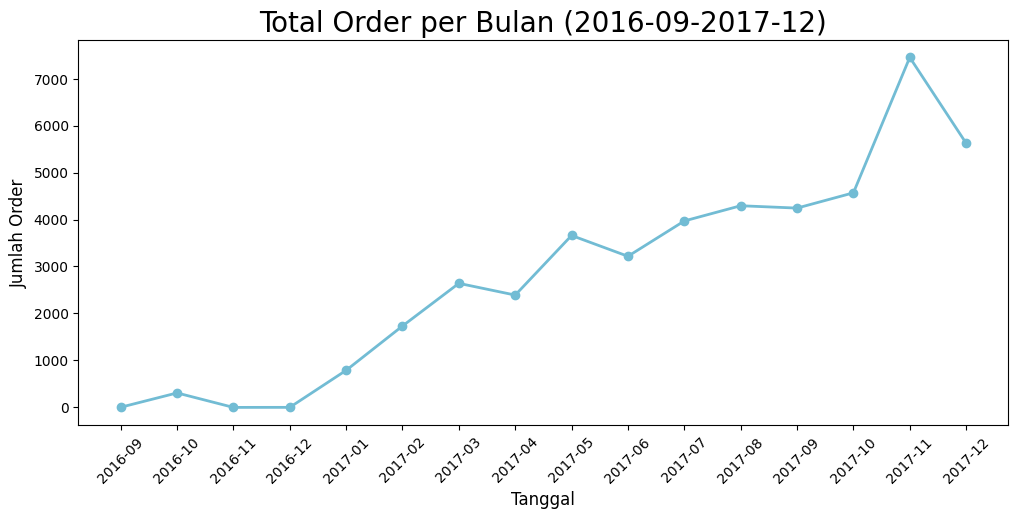

In [65]:
# Menampilkan performa penjualan (order dan revenue) per bulan
monthly_orders_df = order_items_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index)
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

# Menentukan rentang waktu yang ingin ditampilkan (ganti tanggal sesuai kebutuhan)
start_date = '2016-09'
end_date = '2017-12'

filtered_data = monthly_orders_df[(monthly_orders_df['order_purchase_timestamp'] >= start_date) & (monthly_orders_df['order_purchase_timestamp'] <= end_date)]

# Menampilkan performa penjualan (total order per bulan) menggunakan line chart
plt.figure(figsize=(12, 5))
plt.plot(filtered_data["order_purchase_timestamp"], filtered_data["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Order per Bulan ({start}-{end})".format(start=start_date, end=end_date), loc="center", fontsize=20)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Order", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

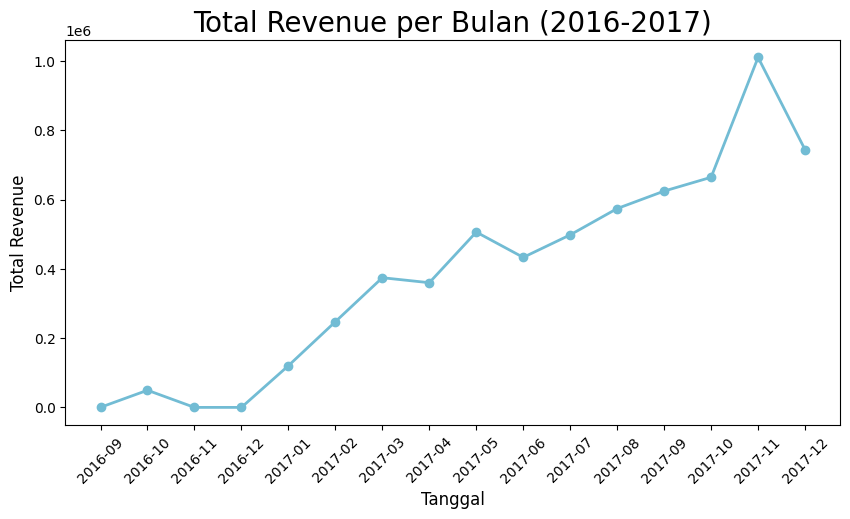

In [75]:
# Menampilkan performa penjualan (total order dan revenue per bulan)
monthly_orders_df = order_items_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index)  # Konversi kembali ke objek tanggal
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

# Filter data untuk rentang tahun 2016-2017
filtered_data = monthly_orders_df[(monthly_orders_df['order_purchase_timestamp'] >= '2016-08-01') & (monthly_orders_df['order_purchase_timestamp'] <= '2017-12-31')]

# Menampilkan performa penjualan (total revenue per bulan) menggunakan line chart
plt.figure(figsize=(10, 5))
plt.plot(filtered_data["order_purchase_timestamp"], filtered_data["revenue"], marker='o', linewidth=2, color="#72BCD4")

plt.title("Total Revenue per Bulan (2016-2017)", loc="center", fontsize=20)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

Produk apa yang paling banyak dan paling sedikit disukai oleh pembeli?

In [66]:
# menampilkan 5 produk yang paling banyak disukai berdasarkan jumlah order
sum_order_items_df = order_items_products_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head()

,product_category_name,order_item_id
0,cama_mesa_banho,13665
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874


In [67]:
# menampilkan 5 produk dengan sedikit disukai berdasarkan jumlah order
sum_order_items_df = order_items_products_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=True).reset_index()
sum_order_items_df.head()

,product_category_name,order_item_id
0,seguros_e_servicos,2
1,fashion_roupa_infanto_juvenil,8
2,pc_gamer,11
3,portateis_cozinha_e_preparadores_de_alimentos,16
4,cds_dvds_musicais,16


C:\Users\b\AppData\Local\Temp\ipykernel_22388\3247969465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\b\AppData\Local\Temp\ipykernel_22388\3247969465.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


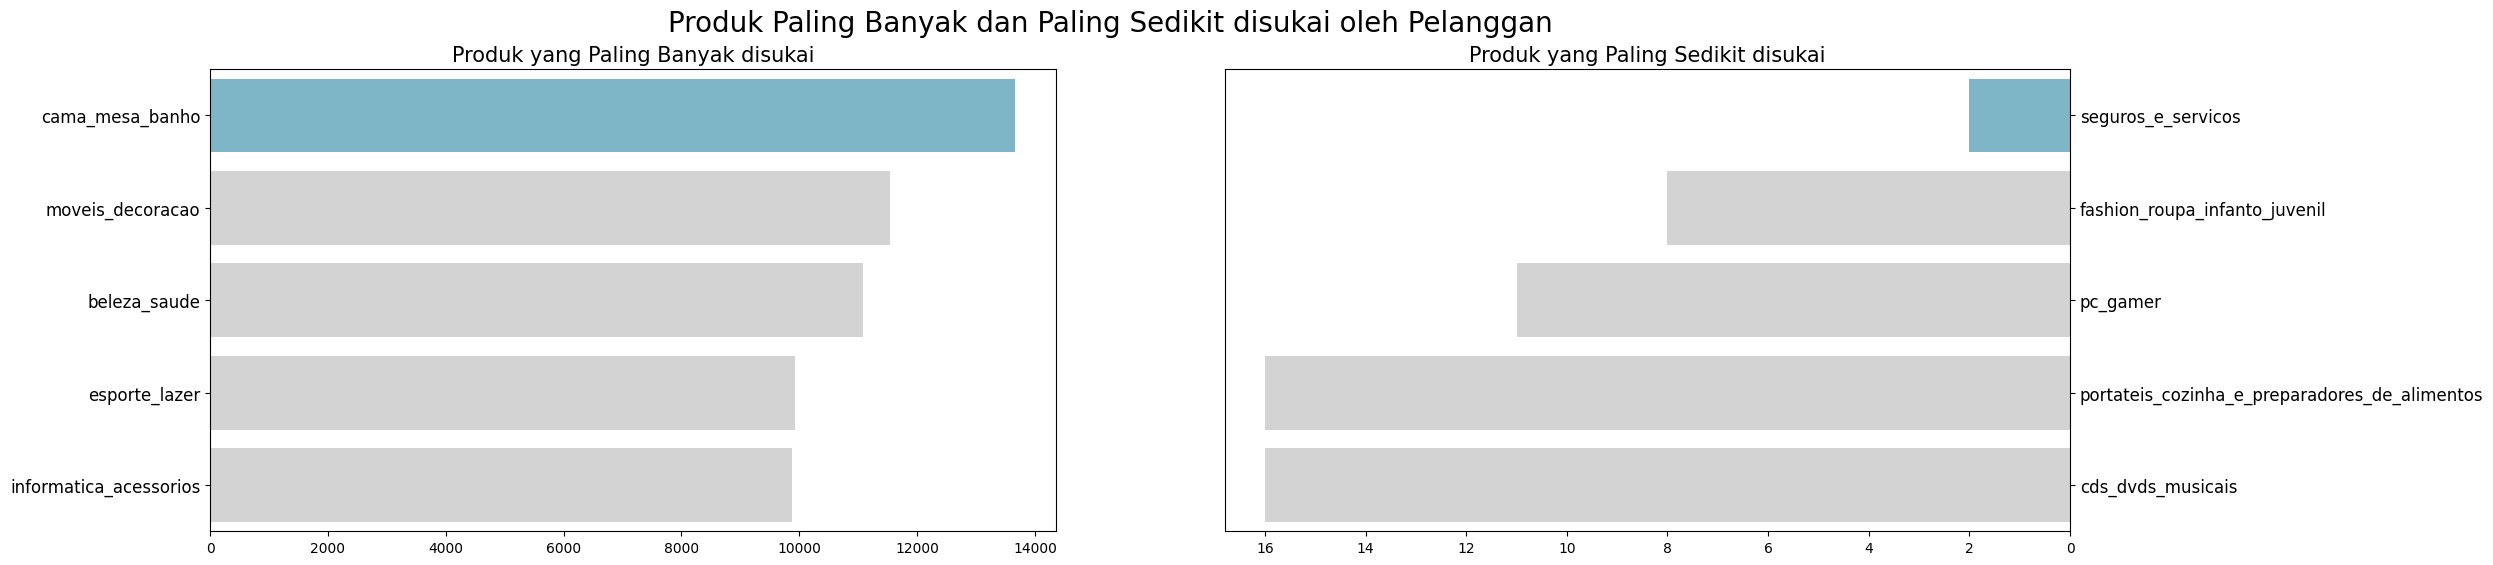

In [68]:
# menampilkan 5 produk dengan banyak disukai dan sedikit disukai dalam bentuk bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sb.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk yang Paling Banyak disukai", loc="center", fontsize=15)
ax[0].tick_params(axis = 'y', labelsize=12)

sb.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk yang Paling Sedikit disukai", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk Paling Banyak dan Paling Sedikit disukai oleh Pelanggan", fontsize=20)
plt.show()

Dimana demografi persebaran daerah pelanggan yang paling banyak dan sedikit dimiliki berdasarkan city?



C:\Users\b\AppData\Local\Temp\ipykernel_22388\2395699731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(
C:\Users\b\AppData\Local\Temp\ipykernel_22388\2395699731.py:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sb.barplot(


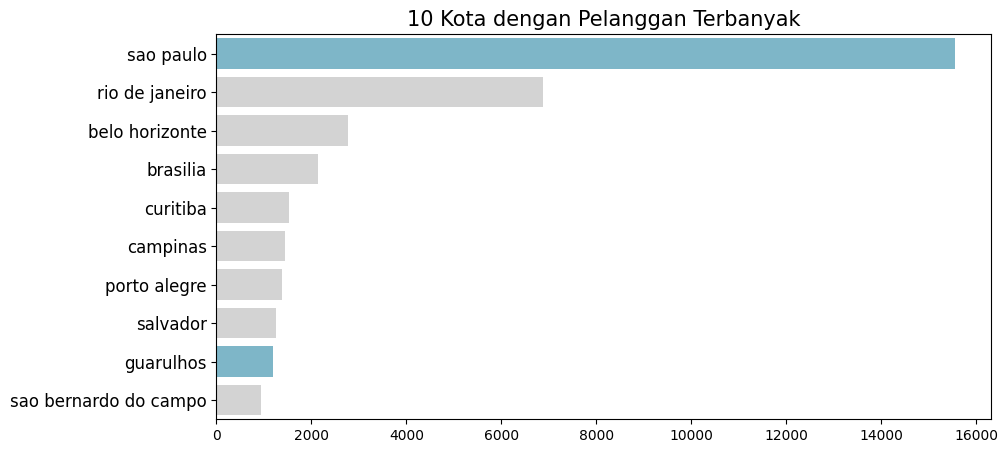

In [69]:
# Menampilkan 10 kota dengan pelanggan terbanyak dalam bentuk bar plot
top10_city_df = orders_customers_df.groupby("customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)
top10_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
top10_city_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sb.barplot(
    x="customer_count",
    y="customer_city",
    data=top10_city_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("10 Kota dengan Pelanggan Terbanyak", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

C:\Users\b\AppData\Local\Temp\ipykernel_22388\461514541.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(
C:\Users\b\AppData\Local\Temp\ipykernel_22388\461514541.py:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sb.barplot(


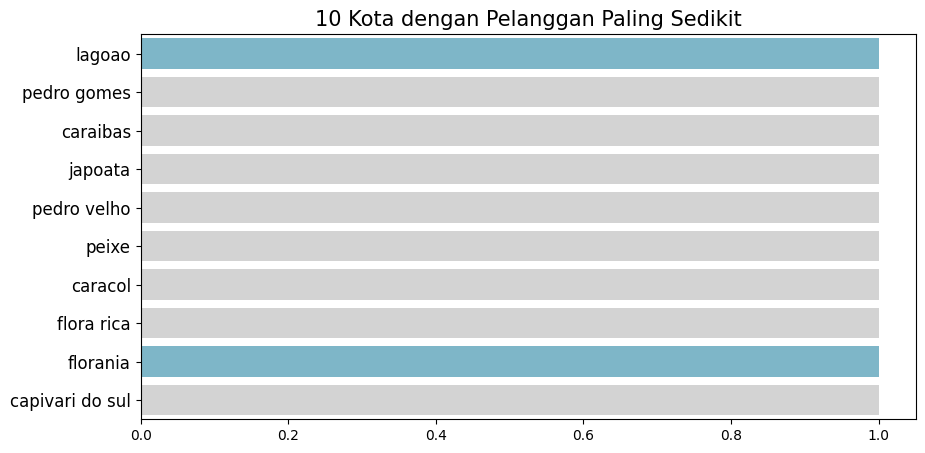

In [70]:
# Menampilkan 10 kota dengan pelanggan paling sedikit dalam bentuk bar plot
top10_city_df = orders_customers_df.groupby("customer_city").customer_id.nunique().sort_values(ascending=True).reset_index().head(10)
top10_city_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
top10_city_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sb.barplot(
    x="customer_count",
    y="customer_city",
    data=top10_city_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("10 Kota dengan Pelanggan Paling Sedikit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Conclution


1. Bagaimana performa penjualan dan revenue perusahaan dalam 1 tahun terakhir?
Jawaban:
> Berdasarkan dengan metode Visualization dan Explanatory analisis diatas disimpulkan bahwa pergerakan grafik total oder per Bulan (2016-2017) berpengeruh pada grafik revenue per Bulan (2016 - 2017). baik jumlah order maupun penjualan tertinggi terjadi pada bulan November 2017 dan mengalami penurunan pada bulan Desember 2017.
2. Produk apa yang paling banyak dan paling sedikit disukai?
Jawaban:
> Berdasarkan gambar dan analisis yang dijelaskan di atas, dapat disimpulkan bahwa 5 produk dengan pesanan terbanyak atau terpopuler di kalangan pembeli adalah cama_mesa_banho dengan pesanan 13665, moveis_designacao dengan pesanan 11540, beleza_saude dengan pesanan 11081, esporte_lazer dengan pesanan 9932  dan informatica_accessorios dengan 9874 pesanan.
 Sedangkan  5 produk yang peminatnya paling sedikit adalah seguros_e_servicos sebanyak 2 pesanan, fashion_roupa_infanto_juvenil sebanyak 8 pesanan, pc_gamer sebanyak 11 pesanan, portateis_cozinha_e_preparadores_de_alimentos sebanyak 16 pesanan dan cds_dvds_musicais sebanyak 16 pesanan.
 Untuk produk yang kurang diminati, diperlukan analisis yang lebih mendalam. Selama periode 3 tahun ini, berapa banyak pendapatan yang dihasilkan dari jumlah pesanan ini. Apakah  harganya benar-benar sangat tinggi sehingga  penjualan kecil pun dapat menghasilkan penjualan yang menguntungkan, atau hanya sedikit orang yang tertarik dengan produk tersebut? Selanjutnya langkah-langkah apa yang dilakukan agar persediaan yang telah diproduksi dapat  habis dan harus dikaji ulang apakah produk tersebut layak untuk dilanjutkan produksinya.



3. Dimana demografi persebaran daerah pelanggan yang paling banyak dan sedikit dimiliki berdasarkan city?
Jawaban:
> Berdasarkan visualisasi dan analisis yang dijelaskan di atas, dapat disimpulkan bahwa 10 pelanggan terbesar berlokasi di kota Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, Curitiba, Campinas, Porto Alegre, Salvador, Guarulhos dan sao Bernardo do campo.
sedangkan sebaliknya bahwa 10 pelanggan terendah berlokasi di kota Lagoao, Pedro Gomes, Caraibas, Japoato, Pedro Velho, Peixe, Caracol, Flora Rica, Florancia, Capivari Do Sul.











In [72]:
all_df.to_csv("main_data.csv", index=False)